In [1]:
import pandas as pd

## 1. Data preparation

#### Import data 

In [4]:
df = pd.read_csv("IR Dec25_480min.csv", parse_dates = ["Timestamp (UTC)"], index_col = "Timestamp (UTC)")

In [5]:
df.head()

,Open,High,Low,Close,IR Dec25: Volume
Timestamp (UTC),,,,,
2024-02-07 06:08:00,96.39,96.40,96.35,96.36,1350
2024-02-07 14:08:00,96.37,96.40,96.36,96.37,316
2024-02-07 21:28:00,96.39,96.40,96.37,96.39,1280
2024-02-08 05:28:00,96.38,96.38,96.37,96.38,466
2024-02-08 06:08:00,96.37,96.39,96.35,96.36,489


In [6]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(147, 5)

**rename volume column:**

In [10]:
df = df.rename(columns={'IR Dec25: Volume': 'Volume'})

## 2. Create features

In [12]:
df['hl'] = df['High'] - df['Low']

In [13]:
df['oc'] = abs(df['Open'] - df['Close'])

In [14]:
df['hl-oc'] = df['hl']-df['oc']

In [15]:
df['hl/vol'] = (df['hl']/df['Volume'])

In [16]:
df['5DayRollingStdDev'] = df['Close'].rolling(window=5).std()

In [17]:
df.dropna(inplace = True)

In [18]:
df.head()

,Open,High,Low,Close,Volume,hl,oc,hl-oc,hl/vol,5DayRollingStdDev
Timestamp (UTC),,,,,,,,,,
2024-02-08 06:08:00,96.37,96.39,96.35,96.36,489,0.04,0.01,0.03,0.000082,0.013038
2024-02-08 14:08:00,96.36,96.36,96.34,96.34,157,0.02,0.02,0.00,0.000127,0.019235
2024-02-08 21:28:00,96.36,96.36,96.32,96.34,1077,0.04,0.02,0.02,0.000037,0.022804
2024-02-09 05:28:00,96.35,96.35,96.35,96.35,5,0.00,0.00,0.00,0.000000,0.016733
2024-02-09 06:08:00,96.33,96.33,96.29,96.30,1436,0.04,0.03,0.01,0.000028,0.022804


In [19]:
df.shape

(143, 10)

#### Statistical analysis (mini)

In [21]:
df.describe(percentiles=[.25, .8, .9, .95, .99])

,Open,High,Low,Close,Volume,hl,oc,hl-oc,hl/vol,5DayRollingStdDev
count,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,96.309580,96.323706,96.295455,96.309860,855.65035,0.028252,0.015944,0.012308,0.000067,0.022115
std,0.067112,0.064837,0.069371,0.066756,803.60787,0.022745,0.017772,0.012875,0.000094,0.014065
min,96.110000,96.160000,96.110000,96.130000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.265000,96.280000,96.250000,96.270000,168.50000,0.010000,0.000000,0.000000,0.000018,0.013038
50%,96.300000,96.310000,96.280000,96.300000,626.00000,0.020000,0.010000,0.010000,0.000035,0.018708
80%,96.376000,96.390000,96.360000,96.370000,1575.60000,0.040000,0.030000,0.020000,0.000097,0.031714
90%,96.400000,96.410000,96.390000,96.398000,1964.00000,0.050000,0.040000,0.030000,0.000147,0.041425
95%,96.419000,96.430000,96.409000,96.420000,2276.60000,0.069000,0.049000,0.030000,0.000228,0.048287
99%,96.435800,96.450000,96.420000,96.435800,3187.44000,0.107400,0.081600,0.055800,0.000432,0.066750


#### Get features

In [23]:
X = df[['hl','oc','hl-oc', 'hl/vol','Volume','5DayRollingStdDev']]
X = X.dropna()
X.head()

,hl,oc,hl-oc,hl/vol,Volume,5DayRollingStdDev
Timestamp (UTC),,,,,,
2024-02-08 06:08:00,0.04,0.01,0.03,0.000082,489,0.013038
2024-02-08 14:08:00,0.02,0.02,0.00,0.000127,157,0.019235
2024-02-08 21:28:00,0.04,0.02,0.02,0.000037,1077,0.022804
2024-02-09 05:28:00,0.00,0.00,0.00,0.000000,5,0.016733
2024-02-09 06:08:00,0.04,0.03,0.01,0.000028,1436,0.022804


In [24]:
X.shape

(143, 6)

## 3. Normalize (as some features might dominate due to larger scale)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaling to all columns except the index
normalized_data = scaler.fit_transform(X)

# Create a new DataFrame with normalized data
normalized_df = pd.DataFrame(normalized_data, columns=X.columns, index=X.index)

normalized_df.head()


,hl,oc,hl-oc,hl/vol,Volume,5DayRollingStdDev
Timestamp (UTC),,,,,,
2024-02-08 06:08:00,0.333333,0.1,0.500000,0.114519,0.132249,0.189781
2024-02-08 14:08:00,0.166667,0.2,0.000000,0.178344,0.042276,0.279982
2024-02-08 21:28:00,0.333333,0.2,0.333333,0.051996,0.291599,0.331918
2024-02-09 05:28:00,0.000000,0.0,0.000000,0.000000,0.001084,0.243561
2024-02-09 06:08:00,0.333333,0.3,0.166667,0.038997,0.388889,0.331918


***If a normalized value is 0.33 after Min-Max scaling, it implies that the original value is approximately 33% of the way between the minimum and maximum values of that feature's range.***

## 4. Finding states by clustering

In [29]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.cluster import KMeans

In [31]:
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

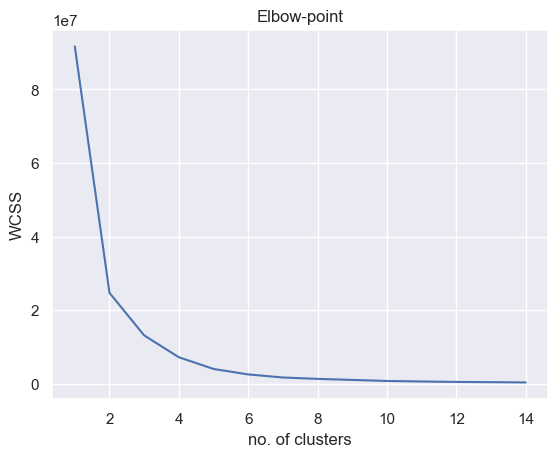

In [33]:
sns.set()
plt.plot(range(1,15),wcss)
plt.title('Elbow-point')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

**Selecting k=4**

**Fit the model**

In [36]:
#Building the model with 4 clusters
km_model = KMeans(n_clusters=4, init = "random", n_init = 10, verbose=0)

**Predict the clusters**

In [38]:
clusters = km_model.fit_predict(X)
clusters

array([0, 0, 3, 0, 2, 0, 3, 0, 0, 2, 0, 3, 0, 2, 0, 2, 3, 2, 0, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 3, 0, 2, 0, 3,
       0, 3, 0, 3, 2, 2, 0, 2, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0,
       2, 0, 2, 3, 2, 0, 3, 0, 3, 0, 3, 0, 2, 0, 0, 0, 2, 0, 3, 3, 3, 0,
       0, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 0, 2, 0, 3, 3, 3, 0, 2, 2, 2, 0,
       3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 2, 3, 2, 0, 2, 3, 1, 0, 0, 3, 0, 2,
       3, 1, 0, 2, 2, 3, 0, 3, 3, 2, 0])

In [39]:
X['Cluster'] = clusters

In [40]:
X.head()

,hl,oc,hl-oc,hl/vol,Volume,5DayRollingStdDev,Cluster
Timestamp (UTC),,,,,,,
2024-02-08 06:08:00,0.04,0.01,0.03,0.000082,489,0.013038,0
2024-02-08 14:08:00,0.02,0.02,0.00,0.000127,157,0.019235,0
2024-02-08 21:28:00,0.04,0.02,0.02,0.000037,1077,0.022804,3
2024-02-09 05:28:00,0.00,0.00,0.00,0.000000,5,0.016733,0
2024-02-09 06:08:00,0.04,0.03,0.01,0.000028,1436,0.022804,2


In [41]:
X.groupby(['Cluster']).size()

Cluster
0    67
1     4
2    30
3    42
dtype: int64

#### Cluster analysis

In [43]:
# store clusters to analyze
C2=X.loc[(X['Cluster']==0)] #use 1,2,3.. to view the clusters

C2.describe()

,hl,oc,hl-oc,hl/vol,Volume,5DayRollingStdDev,Cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,0.014627,0.008657,0.005970,0.000106,200.208955,0.021514,0.0
std,0.013408,0.009518,0.008359,0.000126,179.844338,0.013596,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,0.010000,0.000000,0.000000,0.000020,44.500000,0.012643,0.0
50%,0.010000,0.010000,0.000000,0.000078,146.000000,0.018708,0.0
75%,0.020000,0.010000,0.010000,0.000136,304.500000,0.027657,0.0
max,0.060000,0.040000,0.030000,0.000714,536.000000,0.068702,0.0


**Saving files**

In [45]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [46]:
C2.describe().to_excel('cluster0.xlsx', index=True) # for cluster analysis

In [47]:
X.to_excel('IR Dec25_Cluster_Analysis.xlsx', index=True) # for visual analysis